<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BDS/blob/main/modulo.07/bds_series_temporales_001_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20BDS%20Horizontal%208.png?raw=true">
</p>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.formula.api import ols
from statsmodels.tsa import x13

In [ ]:
dolar = [16.87,16.64, 16.28,15.98,15.99,16.36,16.84,18.09,18.23,17.91,18.1,17.96,19.28,19.95,20.35,20.76,21,25.97,29.4,28.45,38,41.3,36.5,38,40.5,37.5,39,43.65,46,46,43.8,45.2,63,61.25,69,69.25,78.5,78,78.5,83.5,118,125,126,136,135,146,169,155,166,155,145,141,150,157,168,180.5,182,186,198,201.5,208.5,212.5,210.5,200,199,206,238,298,290,288,291,314,347,382,375,393,468,490,493]
IPC = [1,1.013,1.038325,1.0632448,1.0908892,1.1050707,1.1205417,1.1395909,1.1566848,1.1798185,1.1951561,1.209498,1.2506209,1.2706309,1.3036673,1.3362589,1.3710017,1.3970507,1.4515357,1.4921787,1.553358,1.6558796,1.7403295,1.7907991,1.8409414,1.8924878,1.9644023,2.0586936,2.1245718,2.188309,2.245205,2.2923543,2.3817562,2.519898,2.6005347,2.7071567,2.8100286,2.8634192,2.9149607,3.0198993,3.0621779,3.1081106,3.1702728,3.2209971,3.3111851,3.4038982,3.5264386,3.6322317,3.7666243,3.8909229,4.0309961,4.2406079,4.4144729,4.5645649,4.7060664,4.8519545,4.9781053,5.1672733,5.3636297,5.4869932,5.7119599,5.9347264,6.2077238,6.6236413,7.034307,7.3719537,7.7774112,8.3529396,8.9376454,9.4739041,10.099182,10.604141,11.16616,11.83613,12.629151,13.614224,14.785048,15.967852,16.893987]
PBI = [460369,514396,481152,484544,493603,581668,514698,522255,532348,614076,562979,572794,576847,674621,610426,625877,616720,711406,647088,613491,578553,631198,610520,615221,611607,733731,668567,668190,662326,766333,711417,703050,672686,730838,703462,706958,677086,776487,721459,706597,671066,760577,690880,686701,672750,791236,718281,703682,677652,760703,694382,693174,681445,778402,721120,724593,707324,747428,696102,678656,665849,751784,683901,671361,632389,609380,614192,642403,654122,723768,687659,700592,691851,773160,727030,711199,701176]

 # **<font color="DeepPink">Repaso</font>**

 <p align="justify">
Las series de tiempo pueden ser no estacionarias en media y en varianza. En general, una serie $\{ Z_t \}$ que sigue un proceso:<br><br>
$$ Z_t = M_t + S_t + X_t $$ <br>
donde $M_t$ es una función que representa la tendencia de la serie, $S_t$ es una función cíclica y $X_t \sim ARMA(p,q)$ será no estacionario en media (puede que también en varianza). Para ver esto basta tomar esperanza:<br><br>
$$ E[Z_t] = M_t + S_t $$<br>
Dado que $M_t$ y $S_t$ son funciones (no constantes) del tiempo, $E[Z_t]$ también es función del tiempo.<br><br>
Para poder predecir los valores futuros de una serie necesitamos identificar y estimar cada uno de sus componentes. Afortunadamente, esto lo podemos hacer de forma secuencial:<br><br>
1. En primer lugar debemos identificar y estimar la estacionalidad. Luego construimos una nueva serie $Z'_t = Z_t - \hat{S}_t$ que solo está compuesta por tendencia y un proceso $ARMA(p,q)$.<br><br>
2. En segundo lugar debemos identificar y remover la tendencia para construir una serie estacionaria $X_t = Z'_t - M_t$.<br><br>
3. Finalmente, identificamos el proceso $ARMA(p,q)$ que sigue la serie $X_t$.



# **<font color="DeepPink">Componente estacional</font>**
El primer paso consiste en determinar si la serie contiene una componente estacional. Existen diversas formas de determinar este hecho, o si la serie necesita un tratamiento estacional. Veremos algunas utilizando la serie trimestral de PBI. <br>
1. Graficar los datos y observar si presentan un comportamiento cíclico.


Text(0, 0.5, 'PBI a precios corrientes')

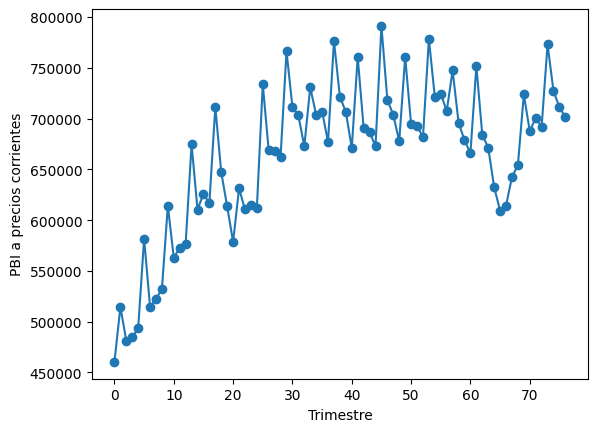

In [ ]:
plt.plot(range(len(PBI)),PBI, "-o")
plt.xlabel('Trimestre')
plt.ylabel('PBI a precios corrientes')

 <p align="justify">
La serie presenta un "pico" cada 4 periodos. Es decir que la serie parece presentar un comportamiento estacional cada 4 periodos.<br><br>
2. Graficar la función de autocorrelación parcial: si la serie tiene un comportamiento estacional cada 4 periodos, entonces veremos que la correlación entre momentos que distan entre cada 4 periodos (y múltiplos de 4 también) tiende a ser más alta.

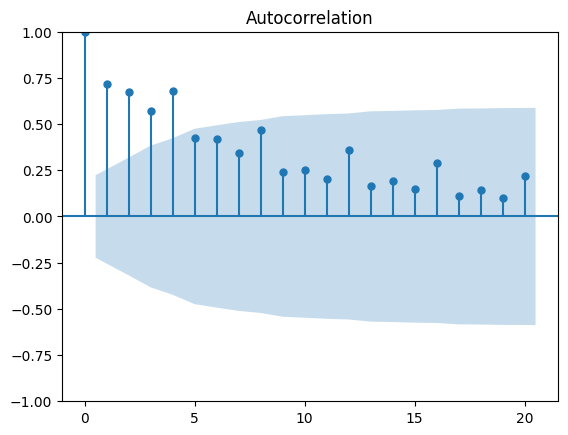

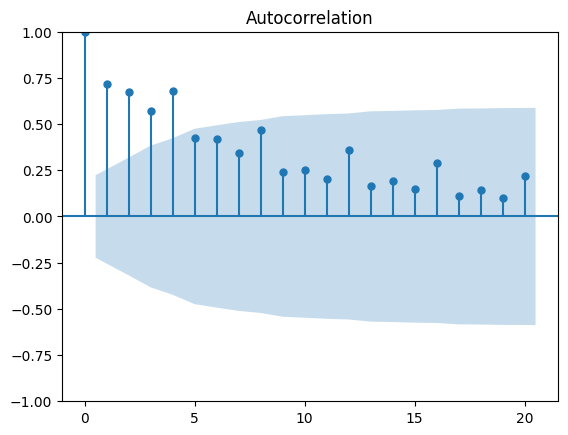

In [ ]:
plot_acf(PBI, lags=20)

<p align="justify">
3. Teoría, intuición o lógica: en general intentamos que los resultados de los análisis que obtenemos tengan algún tipo de interpretación teórica o intuitiva. En este sentido, si estamos trabajando con una serie de ventas mensuales (o trimestrales) de helados de una determinada heladería, es de esperar que la misma presente una estacionalidad anual.<br><br>
4. Periodicidad de la serie: un aspecto importante a tener en cuenta viene dado por el hecho que el estudio de series de tiempo supone la distancia temporal entre dos datos consecutivos cualesquiera es la misma (o puede ser interpretada como la misma). Con relación a esto, la estacionalidad suele ser un producto de la periodicidad de la serie y no del fenómeno en si. Por ejemplo, una serie mensual de ventas podría mostrar estacionalidad anual pero la serie de las mismas ventas diaria podría mostrar una estacionalidad mensual o no mostrar estacionalidad. Muy posiblemente la serie de ventas de helados diaria presente un comportamiento estacional semanal. Esta serie diaria nos lleva a pensar en comportamientos estacionales a distintos niveles (semanal, mensual). Una serie anual de ventas probablemente no presente estacionalidad. Nuestra serie de PBI es trimestral por lo que parece tener sentido que presente estacionalidad un comportamiento estacional cada 4 periodos, ya que es el tiempo que dura un año.

<p align="justify">
Una vez identificada la estacionalidad, el siguiente paso consite en estimar la función $S_t$. Para nuestro caso, la función $S_t$ es una función cíclica que se repite cada 4 periodos. Debemos entonces estimar el valor que toma $S_t$ para todos los primeros trimestre, para todos los segundos, para los terceros y para los cuartos, debemos estimar 4 valores distintos.<br><br>
Para hacer esto debemos notar que si eliminamos de alguna forma la tendencia de los datos, el promedio de lo que ocurre en cada trimestre nos servirá de estimador de estimador de esta fucnión cíclica. Tenemos dos métodos para estimar estos promedios.<br><br>
<strong>Podemos estimar la siguiente regresión lineal</strong>:<br><br>
$$ Z_t = \alpha_1 + \alpha_2 D_2 + \alpha_3 D_3 + \alpha_4 D_4 + \gamma Z_{t-1} + \epsilon_t $$<br>
donde las variables $D_i$ son llamadas variables dicotómicas (o dummies) y toman valor $1$ si observación $t$ considerada cumple que el resto de dividir $t$ por $4$ es $i$. Una vez estimados los coeficientes de esta regresión, se construye la serie desestacionalizada, $Z'_t$, de la siguiente forma:<br><br>
$$ Z'_t = Z_t - \hat{\alpha}_2D_2 - \hat{\alpha}_3D_3 - \hat{\alpha}_4D_4 $$<br>
Construyamos las variables necesarias para realizar la regresión en nuestra serie de PBI y veamos si el método funciona.


In [ ]:
PBIlead = PBI[1:]
PBIlag = PBI[:76]
Tiempo = np.array(list(range(len(PBIlead))))
Tiempo2 = Tiempo**2
D2 = 19*[1,0,0,0] #Representa al trimestre 2
D3 = 19*[0,1,0,0] #Representa al trimestre 3
D4 = 19*[0,0,1,0] #Representa al trimestre 3

df = pd.DataFrame({'PBI': PBIlead, 'Lag': PBIlag, 'Tiempo': Tiempo, 'D2':D2, 'D3':D3, 'D4':D4})

In [ ]:
res = ols('PBI ~ D2 + D3 + D4 + Lag', df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    PBI   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     199.8
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           7.77e-38
Time:                        20:03:46   Log-Likelihood:                -863.14
No. Observations:                  76   AIC:                             1736.
Df Residuals:                      71   BIC:                             1748.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.951e+04   2.33e+04      1.692      0.0

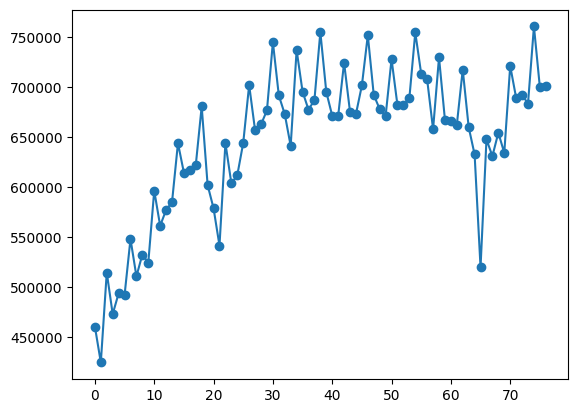

In [ ]:
D2 = np.array([0] + D2)
D3 = np.array([0] + D3)
D4 = np.array([0] + D4)

PBIdes0 =np.array(PBI) - 8.992e+04*D2 - (-3.322e+04)*D3 - 1.172e+04*D4
plt.plot(range(len(PBIdes0)),PBIdes0, "-o")

El método no parece remover adecuadamente la tendencia. Vamos a repetirlo pero considerando la siguiente regresión ahora:<br><br>
$$ Z_t = \alpha_1 + \alpha_2 D_2 + \alpha_3 D_3 + \alpha_4 D_4 + \gamma_1 t + \gamma_2 t^2  \epsilon_t $$

In [ ]:
res = ols('PBI ~ D2 + D3 + D4 + Tiempo + Tiempo2', df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    PBI   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     61.60
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           2.83e-24
Time:                        20:03:23   Log-Likelihood:                -894.28
No. Observations:                  76   AIC:                             1801.
Df Residuals:                      70   BIC:                             1815.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.761e+05   1.28e+04     37.204      0.0

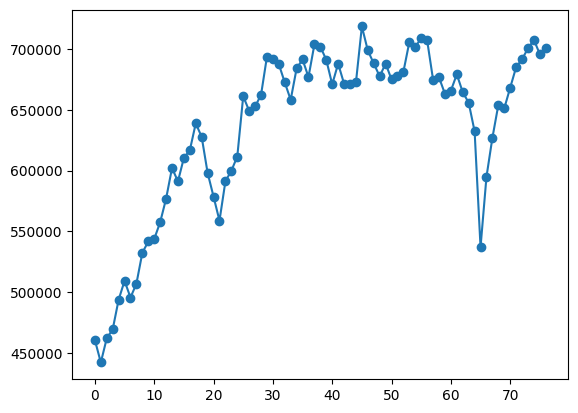

In [ ]:
PBIdes1 =np.array(PBI) - 7.247e+04	*D2 - (1.93e+04)*D3 - 1.535e+04	*D4
plt.plot(range(len(PBIdes1)),PBIdes1, "-o")

In [ ]:
plot_acf(PBIdes, lags=20)

NameError: ignored

<p align="justify">
Ahora si parece que hemos removido adecuadamente la tendencia.<br><br>
<strong>Suavizamiento por promedios móviles</strong><br><br>
Como mencionamos previamente, para remover la estacionalidad necesitamos obtener una estimación (provisoria de la tendencia). Vimos previamente que podemos modelar la tendencia como una función polinómica de grado 2. Otra forma, más flexible, que permite remover provisoriamente la tendencia consiste en elegir una ventana de periodos (por lo general una cantidad impar de periodos) y estimar el componente tendencia de cada momento "t" como un promedio ponderado de las observaciones de la serie dentro de la ventana temporal elegida. Por ejemplo, para nuestro caso podemos considerar una ventana de dos periodos:<br><br>
$$ \hat{M}_t = \frac{0,5 \times Z_{t-2} + Z_{t-1} + Z_{t} + Z_{t+1} + 0,5 \times Z_{t+2}}{4} $$<br>
Una vez estimada la tendencia (provisoria), procedemos a obtener la serie sin tendencia:<br><br>
$$ Z'_t = Z_t - \hat{M}_t $$<br>
Finalmente, la componente estacional de cada periodo viene dada por el promedio de todos los valores de la serie sin tendencia que corresponden al mismo momento del ciclo estacional. Para el caso de nuestra serie de PBI, la component estacional de todos los periodos correspondientes a un primer trimestre vendrá dada por el promedio de todos los valores que toma la serie sin tendencia considerando solo los primeros trimestres.

In [ ]:
M_hat = []
for i in range(len(PBI)):
  if i == 0 or i == 76:
    M_hat.append(PBI[i])
  elif i == 1 or i == 75:
    M_hat.append((0.5*PBI[i-1] + PBI[i] + 0.5*PBI[i+1])/2)
  else:
    M_hat.append( (0.5*PBI[i-2] + PBI[i-1] + PBI[i] + PBI[i+1] + 0.5*PBI[i+2] )/4 )

plt.plot(range(len(M_hat)),M_hat, "-o")

In [ ]:
PBIprime = np.array(PBI) - np.array(M_hat)
D1 = np.array(19*[1,0,0,0] + [1])

S1_hat = np.sum(D1*PBIprime)/np.sum(D1)
S2_hat = np.sum(D2*PBIprime)/np.sum(D2)
S3_hat = np.sum(D3*PBIprime)/np.sum(D3)
S4_hat = np.sum(D4*PBIprime)/np.sum(D4)

PBIdes2 = np.array(PBI) - S1_hat*D1 - S2_hat*D2 - S3_hat*D3 - S4_hat*D4
plt.plot(range(len(PBIdes2)), PBIdes2, "-o")
#plot_acf(PBIdes2, lags=20)

<p align="justify">
Una vez más parece que hemos obtenido una serie desestacionalizada.<br><br>
<strong>Diferenciación</strong><br><br>
El último método que estudiaremos para desestacionalizar una serie consiste en tomar diferencias entre los valores de la serie considerando el ciclo estacional. Para comprender esto, si tenemos una serie cuyo ciclo estacional dura $k$ periodos, entonces:<br><br>
$$ Z_t = M_t + S_t + X_t \quad \text{y} \quad Z_{t+k} = M_{t+k} + S_{t+k} + X_{t+k} $$<br>
pero como el ciclo dura $k$ periodos, $S_t = S_{t+k}$ por lo que:<br><br>
$$ Z_{t} - Z_{t-k} = \Big( M_{t} - M_{t-k} \Big) + \Big( X_{t} - X_{t-k} \Big)  $$<br>
De esta forma obtenemos una nueva serie, que la denotamos $\Delta_k(Z_t)$, que no debería tener estacionalidad (deberemos ver que ocurre con el resto de las componentes).<br><br>
Nota: este método genera que se pierdan los $k$ primeros valores





In [ ]:
delta4 = []
for i in range(len(PBI) - 4):
  delta4.append(PBI[i+4] - PBI[i])

plt.plot(range(len(delta4)), delta4, "-o")

<p align="justify">
Hemos obtenido una serie desestacionalizada, pero sus propiedades han sido modificadas completamente. Por ejemplo, la serie nueva parece no presentar tendencia.<br><br>
En general el algoritmo para obtener series desestacionalizadas más utilizado es X13-ARIMA. Este algoritmo realiza un modelado completo de la serie y desestacionaliza utilizando un método de suavizamiento por promedios móviles. Podemos hacer uso de dicho algortimo mediante el módulo <strong>statmodels.tsa.x13.</strong><br><br>


 # **<font color="DeepPink">Tendencia</font>**

<p align="justify">
Una vez removida la componente estacional, el siguiente paso consiste en determinar si la serie presenta tendencia. Para ello se analíza el gráfico de los datos, pero luego haremos un análisis estadístico más preciso.<br><br>
Ya hemos visto que la serie desestacionalizada de PBI presenta una tendencia. Para removerla tenemos dos posibles métodos:<br>
1. Correr la siguiente regresión:<br><br>
$$ Z'_t = \beta_0 + \beta_1t + \beta_2 t^2 +...+\beta_n t^n + \varepsilon_t $$<br>
y luego construir una serie sin tendencia, $X_t$, de la siguiente forma:<br><br>
$$ X_t = Z'_t - \Big( \hat{\beta_0} + \hat{\beta_1}t + \hat{\beta_2} t^2 +...+\hat{\beta_n} t^n \Big) $$<br>
2. Tomar primeras diferencias: construir una serie $X_t$ de la siguiente forma:<br><br>
$$ X_t = Z_{t} - Z_{t-t} $$<br>
Si la serie $X_t$ no es estacionaria, podemos aplicar el método nuevamente sobre la serie $X_t$.
Veamos los dos métodos con la serie desestacionalizada por suavizamiento.

In [ ]:
Tiempo = np.array(list(range(len(PBIdes2))))
Tiempo2 = Tiempo**2
PBIdes = np.array(PBIdes2)

In [ ]:
df = pd.DataFrame({'PBIdes': PBIdes2, 'Tiempo': Tiempo, 'Tiempo2': Tiempo2})
res = ols('PBIdes ~ Tiempo + Tiempo2', df).fit()
res.summary()

In [ ]:
X1 = PBIdes - (4.926e+05 + 8921.3583	*Tiempo - 87.7286*Tiempo2)
plt.plot(range(len(X1)), X1, "-o")

Cuidado con lo que se observa para los periodos posteriores a la pandemia/cuarentena.

In [ ]:
#Tomando diferencias
X2 = []
for i in range(len(PBIdes)-1):
  X2.append(PBIdes[i+1] - PBIdes[i])
plt.plot(range(len(X2)), X2, "-o")

<p align="justify">Si bien el problema del outlier sigue estando presente, esta serie parece ser estacionaria en la media.<br><br>
La elección del método para remover la tendencia no es innocente. Necesitamos que el método utilizado se ajuste al verdadero proceso generador de datos.<br><br>
<strong>Tendencia determinística</strong>: si el verdadero proceso generador de datos es<br><br>
$$ Z'_t = \beta_0 + \beta_1 t + X_t $$<br>
decimos que el proceso presenta una tendencia deterministica que puede ser removida por el método de regresión. <strong>¡Cuidado con utilizar polinomios de grado mayor a 1!</strong> Las predicciones futuras de los datos quedan completamente dominadas por la tendencia.<br><br>
<strong>Tendencia estocástica:</strong> Para entender como funciona una tendencia estocastica es mejor volver al modelo $AR(1)$:<br><br>
$$ Z_t = \phi Z_{t-1} + A_t \quad | \phi | <1 $$ <br>
Para que $Z_t$ siga un proceso estacionario se debe cumplir que $ | \phi | <1$. ¿Qué ocurre si esta condición no se cumple?<br><br>
$$ Z_t = Z_{t-1} + A_t $$<br>
Este proceso se lo conoce como "Random Walk $(RW)$".



In [ ]:
WN = norm.rvs(0, 4, 200)  #simulamos 100 valores de forma aleatoria
phi = 1
Z = []                    #Z será el RW
for i in range(len(WN)):
  if i == 0:
    Z.append(WN[i])
  else:
    Z.append(phi*Z[i-1] + WN[i])

plt.plot(range(len(Z)), Z, "-o")

<p align="justify">
Las tendencias aleatorias son resultado de la presencia de una (o más) raices unitarias (de valor 1) en el polinomio caracteristico de la parte autorregresiva del proceso. A estos procesos se los conoce como procesos Integrados. Si el proceso presenta una raíz unitaria (como el $RW$) se dice que el proceso es Integrado de orden 1.<br><br>
Existe una diferncia muy importante entre los procesos con tendencia deterministica y los procesos integrados. Los primeros son no estacionarios en media mientras que los segundos son no estacionarios en media y en varianza. Hay una diferencia muy importante en la estimación de las predicciones futuras y de sus intervalos de confianza.<br><br>
Un proceso no estacionario en media puede presentar tendencia deterministica y estocastica simultaneamente. Para determinar como remover la tendencia vamos a usar el test de Dickey-Fuller.


 # **<font color="DeepPink">Test de Dickey-Fuller</font>**
 <p align="justify">
 Supongamos de forma general que $Z_t$ sigue un proceso que puede ser escrito de la siguiente forma:<br><br>
 $$ Z_t = \alpha + \phi Z_{t-1} +\beta t + \epsilon_t  $$<br>
 donde $\epsilon_t$ sigue un proceso estacionario, y estamos interesados en conocer si $\phi = 1$ y si $\beta = 0$. Podemos restar $Z_{t-1}$ en ambos miembro de la ecuación anterior de forma de obtener:<br><br>
 $$ Z_t - Z_{t-1} = \alpha + (\phi -1)Z_{t-1} + \beta t + \epsilon_t $$<br>
 $$ \Delta Z_t = \alpha + \gamma Z_{t-1} + \beta t + \epsilon_t $$<br>
 Podemos regresar la variable $\Delta Z_t$ en $t$ y $Z_{t-1}$ y testear las hipotesis $\gamma = 0$ y $\beta = 0$.<br><br>
 Cuidado: si <strong>no rechazamos la hipotesis $\gamma = 0$</strong> entonces el proceso presenta una raiz unitaria, <strong>si rechazamos $\beta = 0$</strong> el proceso presenta tendencia determinística.<br><br>
 Debemos tener en cuenta dos aspectos adicionales:<br><br>
 1. Bajo hipotesis nula, $\phi = 1$, $\gamma$ no converge a una distribución normal (no se cumple el teorema del límite central). Si llevamos a cabo una regersión con statmodels.ols los resultados de los test $t$ no son válidos. Por este motivo se utiliza la distribución Dickey-Fuller <br><br>
 2. El proceso lo haremos de forma secuencial:
 Primero testearemos si $\beta$ es significativamente distinto de $0$.<br><br>  
*   Si la respuesta es afirmativa, realizamos el test para $\gamma$, si la respuesta es negativa corremos una nueva regresión pero sin el término $\beta t$ y testeamos si $\alpha$ es significativamente distinto de $0$.<br><br>
*   Si la respuesta en afirmativa, realizamos el test para $\gamma$, si la respuesta es negativa corremos una nueva regresión pero sin los términos $\beta t$ y $\alpha$ y realizamos el test para $\gamma$.<br><br>
El proceso siempre termina cuando realizamos el test para $\gamma$. Muy importante tener en cuenta qu ela hipótesis nula es que existe raíz unitaria.<br><br>
Vamos a realizar el test Dickey-Fuller sobre la serie de PBI desestacionalizada que hemos construido. statmodels nos permite realizar el test de Dickey-Fuller aumentado, donde $\epsilon_t$ es modelado como un proceso $MA(q)$ donde debemos establecer la cantidad de lags, $q$, a priori.



In [ ]:
#Primero hacemos una regresión normal para determinar si el test debe ser realizado con o sin tendencia
deltaPBIdes = []
for i in range(len(PBIdes)-1):
  deltaPBIdes.append(PBIdes[i+1] - PBIdes[i])
delta = np.array(deltaPBIdes)

PBIdes1 = []
for i in range(len(PBIdes)-1):
  PBIdes1.append(PBIdes[i+1])
PB1des1 = np.array(PBIdes1)

Tiempo = np.array(range(len(PBIdes1)))

df = pd.DataFrame({'PBIdes1': PBIdes1, 'Tiempo': Tiempo, 'delta': delta})
res = ols('delta ~ PBIdes1 + Tiempo', df).fit()
print(res.summary())

NameError: ignored

In [ ]:
df = sm.tsa.stattools.adfuller(PBIdes,              #serie a testear
                               maxlag=None,         #cantidad de lags considerados en la parte MA
                               regression='n',     #ct = constante y tendencia, c = constante sola, n = sin constante y sin tendencia
                               autolag='AIC',       #Guarda el criterio de información de Akaike, deberiamos elegir la cantidad de lags en función de este
                               store=True,
                               regresults=True)     #Guarda los resultados de la regresión completa
df

Como podemos observar, no se rechaza la hipótesis nula de presencia de raiz unitaria. La serie parece no presentar tendencia determinística pero si raíz unitaria. El proceso correcto para remover la tendencia es diferenciar. La serie sin estacionalidad y sin tendencia es:

In [ ]:
X2 = []
for i in range(len(PBIdes)-1):
  X2.append(PBIdes[i+1] - PBIdes[i])
plt.plot(range(len(X2)), X2, "-o")

A partir de este punto, debemos realizar el análisis $ARMA$ sobre la serie sin tendencia y sin estacionalidad como vimos en el colab anterior.

 # **<font color="DeepPink">Un poco de teoría (económica)</font>**

<p align="justify">
Vamos a intentar realizar algunas predicciones pero sobre la serie de tiempo del precio del dolar.


In [ ]:
plt.plot(range(len(dolar)), dolar, "-o")

 <p align="justify">
Vamos a tener en cuenta algunas propuestas teóricas respecto a como funciona el tipo de cambio de un país con relación a los precios nacionales:<br><br>
1. Ley del único precio: $P^{Arg}_{i} = TCN \times P^{USA}_i$ (el precio de un Big-Mac en Argentina es el precio del Big-Mac en Estados Unidos multiplicado por el valor del dolar en Argentina).<br><br>
2. Paridad de poder de compra absoluta: $IPC^{Arg} = TCN \times IPC^{USA}$ (una canasta típica Argentina cuesta lo mismo que una canasta típica en Estados Unidos multiplicada por el valor del dolar en Argentina).<br><br>
3. Paridad de poder de compra relativa:<br><br>
$$\text{inflación argentina} = \text{inflación en EEUU} + \text{depreciación del peso} $$<br>
Las 3 propuestas vinculan directamente los precios de argentina con el tipo de cambio. <br><br>
Otro aspecto interesante a tener en cuenta es que el tipo de cambio es un precio más. En general, los precios siguen procesos como los $RW$ pero este no parece ser el caso. Veamos que pasa con la serie si la dividimos por el índice de precios al consumidor.

In [ ]:
dolar = np.array(dolar)
IPC = np.array(IPC)
dolar_real = dolar/IPC
plt.plot(range(len(dolar_real)), dolar_real, "-o")

A simple vista, esta nueva serie parece seguir un proceso $RW$. Si es así, el precio del dolar lo podemos modelar de la siguiente forma:<br><br>
$$ \frac{TCN_t}{IPC_t} = \frac{TCN_{t-1}}{IPC_{t-1}} + A_t$$<br>
Empecemos realizando un test de raiz unitaria.

In [ ]:
df = sm.tsa.stattools.adfuller(dolar_real,              #serie a testear
                               maxlag=None,         #cantidad de lags considerados en la parte MA
                               regression='ct',     #ct = constante y tendencia, c = constante sola, n = sin constante y sin tendencia
                               autolag='AIC',       #Guarda el criterio de información de Akaike, deberiamos elegir la cantidad de lags en función de este
                               store=True,
                               regresults=True)     #Guarda los resultados de la regresión completa
df

No se rechaza la hipótesis nula de raíz unitaria. Si nuestra propuesta es correcta, al diferenciar la serie "dolar_real" obtendremos un proceso $WN$. Esto lo podemos testear con un test de Ljung-Box y graficando las funciones de autocorrelación y autocorrelación parcial.

In [ ]:
dif_dolar_real = []
for i in range(len(dolar_real)-1):
  dif_dolar_real.append(dolar_real[i+1] - dolar_real[i])
dif_dolar_real = np.array(dif_dolar_real)

plt.plot(range(len(dif_dolar_real)), dif_dolar_real, "-o")
plt.plot(range(len(dif_dolar_real)), np.linspace(0,0,len(dif_dolar_real)), color='black')

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(dif_dolar_real, lags=20, ax=axes[0])
plot_pacf(dif_dolar_real, lags=20, ax=axes[1])

In [ ]:
sm.stats.acorr_ljungbox(dif_dolar_real, lags=[20], return_df=True)

<p align="justify">
Como podemos observar, no se rechaza la hipótesis nula de $WN$. Esto implica que el modelo propuesto funciona "bien". ¿Cómo podemos utilizar este modelo para predecir el valor del dolar? Dado:<br><br>
 $$ \frac{TCN_t}{IPC_t} = \frac{TCN_{t-1}}{IPC_{t-1}} + A_t$$<br>
 Podemos escribir:<br><br>
 $$ TCN_t = \frac{IPC_t}{IPC_{t-1}} \times TCN_{t-1} + IPC_{t} \times A_t$$<br>
 O lo que es lo mismo:<br><br>
$$ TCN_t = \text{Inflación}_t \times TCN_{t-1} + IPC_{t} \times A_t$$<br>
En base a este modelo, y teniendo en cuenta que $A_t$ es independiente de la variable $IPC_t$, podemos predecir el precio del dolar dentro de $k$ meses dado el último dato que tenemos de la siguiente forma:<br><br>
$$ E_t[TCN_{t+k}] = E_t[\text{Inflación}_{t+k} \times TCN_{t+k-1}] $$<br>
Vamos a suponer que la inflación el momento $t$ es independiente del valor del dolar en el momento $t-1$ (supuesto simplificador pero no muy problemático) tenemos: <br><br>
$$ E_t[TCN_{t+k}] = E_t[\text{Inflación}_{t+k}] \times E_t[TCN_{t+k-1}] $$<br><br>
La predicción para el dolar a futuro no es más que ajustar su valor según la inflación esperada. <br><br>
Ahora vamos a realizar dos supuestos adicionales:<br><br>
1. La inflación esperada para los próximos 6 meses es igual a la publicada por el BCRA en su informe sobre relevamientos de expectativas de mercado, concretamente la mediana de cada mes:<br><br>
$$ E_t[\text{inflación}_{t+k}] = REM_{t+k} $$<br>
2. Vamos a suponer que nuestra predicción de inflación es perfecta (supesto simplificador y muy problemático). Esto quiere decir que consideramos la inflación esperada como una constante y no como una variable aleatoria.
Estimemos ahora el precio del dólar para el 31 de diciembre del 2023:<br><br>
$$ \hat{TCN}_{diciembre} = REM_{diciembre} \times \hat{TCN}_{noviembre} \\ = REM_{diciembre} \times REM_{noviembre} \times \hat{TCN}_{octubre} =  \text{ } ... = \qquad \\ 1,07 \times 1,079 \times 1,078 \times 1,078 \times 1,08 \times 1,088 \times  TCN_{junio} = \\ 1,07 \times 1,079 \times 1,078 \times 1,078 \times 1,08 \times 1,088 \times 493 = 777  $$<br><br>
Pero, dado que conocemos el valor de julio para el dolar:<br><br>
$$ 1,079 \times 1,078 \times 1,078 \times 1,08 \times 1,088 \times 550 = 810 $$<br>
Y esto muestra el gran problema de intentar predecir procesos $RW$, el cual viene dado por el error cuadrático medio de las predicciones:<br><br>


$$ ECM (\hat{TCN}_{t+1}) = \text{var}_t (TCN_{t+1}) = \\ \text{var}_t (\text{Inflación}_{t+1} \times TCN_t) + \text{var}_t(IPC_{t+1} \times A_{t+1}) $$<br>
Dado que hemos supuesto predicción perfecta, tenomos que:<br><br>
$$ \text{var}_t (TCN_{t+1}) =  IPC_{t+1}^2 \times  \text{var}_t(A_{t+1}) $$<br>
Multiplicando y dividiendo por $IPC_t^2$ tenemos:<br><br>
$$ \text{var}_t(TCN_{t+1}) = \text{inflación}_{t+1}^2 \times IPC^2_t \times \sigma^2_A $$<br>
Para el siguiente periodo:<br><br>
$$ \text{var}_t (TCN_{t+2}) = \text{var}_t (\text{inflación}_{t+2} \times  TCN_{t+1}) + IPC_{t+2}^2 \times \text{var}(A_{t+2}) $$<br>
Por lo tanto:<br><br>
$$ \text{var}_t (TCN_{t+2}) = \text{inflación}_{t+2}^2 \times \text{var}_t ( TCN_{t+1}) + \bigg ( \frac{IPC_{t+2}}{IPC_t} \bigg) ^2 \times IPC^2_{t} \times \sigma^2_A $$<br>
Teniendo en cuenta que $INF_2 = \frac{IPC_{t+2}}{IPC_t}$ es la inflación acumulada en 2 periodos podemos generalizar de la siguiente forma:<br><br>
$$ \text{var}_t (TCN_{t+k}) = \text{inflación}_{t+k}^2 \times \text{var}_t ( TCN_{t+k-1}) + INF_k ^2 \times IPC^2_{t} \times \sigma^2_A $$<br>
Considerando $\sigma^{TCN}(k) = \sqrt{\text{var}(TCN_{t+k})}$ y suponiendo que $A_t \sim N(0, \sigma^2_A)$ podemos escribir intervalos de confianza al $95 \%$ para nuestras predicciones los cuales vienen dado por:<br><br>
$$ TCN_{t+k} \in \Big( E_t[TCN_{t+k}] - 1.96 \times \sigma^{TCN}(k) ; E_t[TCN_{t+k}] + 1.96 \times \sigma^{TCN}(k)  \Big) $$.<br>
Construyamos entonces nuestras predicciones con sus respectivos intervalos de confinaza.











In [ ]:
n = 6
varA = np.var(dif_dolar_real)
inf = np.array([1.07, 1.079, 1.078, 1.078, 1.08, 1.088])

INF = []
for i in range(len(inf)):
  if i == 0:
    INF.append(inf[0])
  else:
    INF.append(INF[i-1]*inf[i])
INF = np.array(INF)


dolar_pred = []
for i in range(n):
  if i == 0:
    dolar_pred.append(dolar[78]*inf[0])
  else:
    dolar_pred.append(dolar_pred[i-1]*inf[i])

dolar_pred = np.array(dolar_pred)

varpred = []
for i in range(n):
  if i == 0:
    varpred.append(varA * (inf[0]**2) * (IPC[78]**2))
  else:
    varpred.append((varpred[i-1]*inf[i]**2 +  INF[i]*varA))

varpred = np.array(varpred)

dolar_max = dolar_pred + 1.96*np.sqrt(varpred)
dolar_min = dolar_pred - 1.96*np.sqrt(varpred)

plt.plot(range(n), dolar_pred, "-o")
plt.plot(range(n), dolar_max, "-b")
plt.plot(range(n), dolar_min, "-b")

In [ ]:
dolar_max, dolar_min

In [ ]:
dolar_max - dolar_min

In [ ]:
np.log(dolar_max) - np.log(dolar_min)

 # **<font color="DeepPink">Bonus: cuidado con las regresiones entre series de tiempo</font>**

Vamos a simular dos $RW$ independientes (con constantes para que sea más general):<br><br>
$$ X_t = \alpha + X_{t-1} + \mu_t $$<br>
$$ Y_t = \beta + Y_{t-1} + \epsilon_t $$<br>
Donde $\alpha$ y $\beta$ son constantes y $\mu_t$ y $\epsilon_t$ son dos preocesos $WN$ independientes.<br><br>
La independencia entre $X_t$ e $Y_t$ nos lleva a suponer que la correlación entre ambas variables debería ser muy cercana a 0. De igual modo, si regresamos $Y_t$ en $X_t$ esperamos obtener un parámetro estimado no significativamente distinto de 0 y un $R^2$ muy cercano a 0.<br><br>
Veamos que ocurre.

In [ ]:
n = 200
alpha = 0
beta = 0

WN1 = norm.rvs(0, 4, n)  #simulamos n valores de forma aleatoria
X = []
for i in range(len(WN1)):
  if i == 0:
    X.append(WN1[i] + alpha)
  else:
    X.append(X[i-1] + WN1[i] + alpha)

WN2 = norm.rvs(0, 4, n)  #simulamos otros n valores de forma aleatoria
Y = []
for i in range(len(WN2)):
  if i == 0:
    Y.append(WN2[i] + alpha)
  else:
    Y.append(Y[i-1] + WN2[i] + alpha)

plt.plot(range(len(X)), X, "-o")
plt.plot(range(len(Y)), Y, "-o")

In [ ]:
n = 200
alpha = 0
beta = 0

WN1 = norm.rvs(0, 4, n)
X = []
for i in range(len(WN1)):
  if i == 0:
    X.append(WN1[i] + alpha)
  else:
    X.append(X[i-1] + WN1[i] + alpha)

WN2 = norm.rvs(0, 4, n)
Y = []
for i in range(len(WN2)):
  if i == 0:
    Y.append(WN2[i] + alpha)
  else:
    Y.append(Y[i-1] + WN2[i] + alpha)

df = pd.DataFrame({'Y': Y, 'X': X})
res = ols('Y ~ X', df).fit()
res.summary()

 # **<font color="DeepPink">Bonus 2</font>**

Vamos a repetir el análisis del valor del dolar utilizando la serie del dolar en logaritmos.

In [ ]:
log_dolar = np.log(np.array(dolar))
plt.plot(range(len(log_dolar)), log_dolar, "-o")

In [ ]:
df = sm.tsa.stattools.adfuller(log_dolar,              #serie a testear
                               maxlag=None,         #cantidad de lags considerados en la parte MA
                               regression='n',     #ct = constante y tendencia, c = constante sola, n = sin constante y sin tendencia
                               autolag='AIC',       #Guarda el criterio de información de Akaike, deberiamos elegir la cantidad de lags en función de este
                               store=True,
                               regresults=True)     #Guarda los resultados de la regresión completa
df

In [ ]:
dif_log_dolar = []
for i in range(len(log_dolar)-1):
  dif_log_dolar.append(log_dolar[i+1] - log_dolar[i])
dif_log_dolar = np.array(dif_log_dolar)

plt.plot(range(len(dif_log_dolar)), dif_log_dolar, "-o")
plt.plot(range(len(dif_log_dolar)), np.linspace(0,0,len(dif_log_dolar)), color='black')

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(dif_log_dolar, lags=20, ax=axes[0])
plot_pacf(dif_log_dolar, lags=20, ax=axes[1])

In [ ]:
sm.stats.acorr_ljungbox(dif_log_dolar, lags=[20], return_df=True)

In [ ]:
np.var(dif_log_dolar)

Parece ser que $\log(TCN_t)$ sigue un proceso $RW$ de la forma:<br><br>
$$ \log(TCN_t) = \alpha + \log(TCN_{t-1}) + A_t$$<br>
con $A_t \sim WN$, $\text{var}(A_t)=0.007$ y $\alpha$ constante que debemos estimar.<br><br>
Para estimar $\alpha$ solo vamos a regresar $\log(TCN_t)$ contra $\log(TCN_{t-1})$

In [ ]:
log_dolar_lead = log_dolar[1:]
log_dolar_lag = log_dolar[:78]
tiempo = list(range(len(log_dolar_lead)))

df = pd.DataFrame({'log_dolar': log_dolar_lead, 'dif':dif_log_dolar ,'lag': log_dolar_lag, 'Tiempo': tiempo})
res = ols('dif_log_dolar ~ lag + Tiempo', df).fit()
res.summary()

In [ ]:
simulacion = []
for i in range(len(log_dolar)):
  if i == 0:
    simulacion.append(log_dolar[0])
  else:
    simulacion.append(simulacion[i-1] + 0.0363)

plt.plot(range(len(log_dolar)), log_dolar, "-o")
plt.plot(range(len(log_dolar)), simulacion, "-o")

El modelo estimado es:<br><br>
$$ \log(TCN)_t = 0.0363	 + \log(TCN)_{t-1} + A_t \quad \text{con} \quad \text{var}(A_t) = 0.007 \text{ } \forall t$$
En base a esto podemos computar los valores estimados futuros para el $\log(TCN)$ en conjunto con sus intervalos de confianza al $95 \%$.

In [ ]:
n = 6
varA = np.var(dif_log_dolar)

log_dolar_pred = []
for i in range(n):
  log_dolar_pred.append(log_dolar[78] + (i+1)*0.0363 )

log_dolar_pred = np.array(log_dolar_pred)

varpred = []
for i in range(n):
  if i == 0:
    varpred.append(varA)
  else:
    varpred.append((varA + varpred[i-1]))

varpred = np.array(varpred)

log_dolar_max = log_dolar_pred + 1.96*np.sqrt(varpred)
log_dolar_min = log_dolar_pred - 1.96*np.sqrt(varpred)

plt.plot(range(n), log_dolar_pred, "-o")
plt.plot(range(n), log_dolar_max, "-b")
plt.plot(range(n), log_dolar_min, "-b")

In [ ]:
#calculamos nuestras predicciones del valor del dolar exponenciando las predicciones del log_dolar

dolar_pred = np.exp(log_dolar_pred)
dolar_max = np.exp(log_dolar_max)
dolar_min = np.exp(log_dolar_min)

dolar_min,dolar_pred, dolar_max
#plt.plot(range(n), dolar_pred, "-o")
#plt.plot(range(n), dolar_max, "-b")
#plt.plot(range(n), dolar_min, "-b")

Cuidado, por desigualdad de Jensen nuestras estimaciones son sesgadas hacia abajo.

<br>
<br>
<p align="center"><b>
💗
<font color="DeepPink">
Hemos llegado al final de nuestro colab...
</font>
</p>
<br>
<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20BDS%20Horizontal%208.png?raw=true">
</p>

---
